## Final Project Submission

Please fill out:
* Student name: Lorrah Ngine
* Student pace: PT05 GROUP 1.
* Instructor name: Everlyne Asiko



# The Business of Blockbusters: Studio Analysis

![pop.corn.png](Images/pop.corn.png)

## Overview 

### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding 

## Data Preparation

In [2]:
# importing standard  packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading data
boxofficemv = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

tnmovie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [4]:
#view the top 5 entries
boxofficemv.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
imdb_title_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
#view the bottom 5 data entries
imdb_title_ratings.tail(5)

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [7]:
tnmovie_budgets.tail(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


## Data Cleaning, Data Integration & Feature Engineering

In [8]:
boxofficemv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
#change the foreign_gross column datatype from object to float64
boxofficemv['foreign_gross'] = pd.to_numeric(boxofficemv['foreign_gross'].str.replace(',',''),errors='coerce')

In [10]:
#confirm that foreign_gross column is a float64
boxofficemv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [11]:
#removing NaN Values
boxofficemv.dropna(inplace=True)

boxofficemv.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010


In [12]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [13]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
#merge imdb.title.ratings with imdb.title.basics on the basis of sharing tconst column
movie_rating = imdb_title_basics.merge(imdb_title_ratings,on='tconst', how='inner')
movie_rating = movie_rating.sort_values(by='numvotes', ascending=False)
movie_rating.head(4)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2241,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
280,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
12072,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405


In [15]:
#merge boxofficemv with the movie_rating since the two tables share movie titles 
#this gives a clear indication of how movies performed in terms of revenue and rating according to their genres
boxoffice_rating = boxofficemv.merge(movie_rating, left_on= 'title', right_on= 'original_title', how="inner")
boxoffice_rating.head(4)

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733


In [16]:
boxoffice_rating.isna().sum()

title               0
studio              0
domestic_gross      0
foreign_gross       0
year                0
tconst              0
primary_title       0
original_title      0
start_year          0
runtime_minutes    36
genres              4
averagerating       0
numvotes            0
dtype: int64

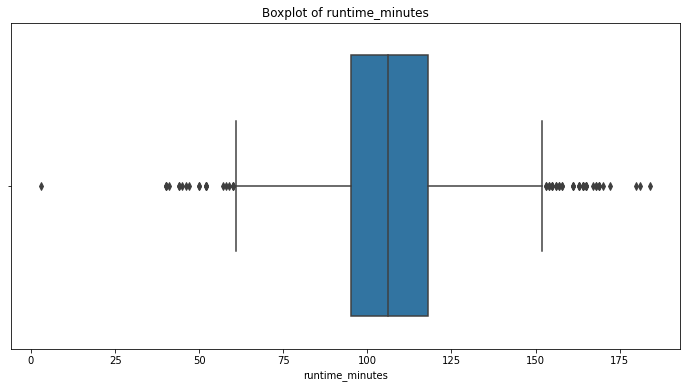

In [17]:
#visualizing the distribution of runtime_minutes in our combined dataframe
col_data = boxoffice_rating.runtime_minutes
plt.figure(figsize=(12,6))
sns.boxplot(x=col_data)
plt.title('Boxplot of runtime_minutes');

<AxesSubplot:>

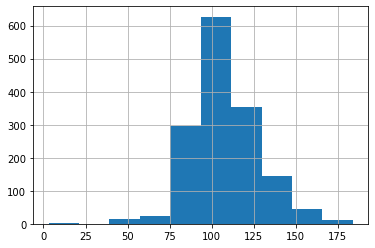

In [18]:
col_data.hist()

In [19]:
#use the mean to fill in the blank spaces in runtime_minutes
boxoffice_rating['runtime_minutes'].fillna(boxoffice_rating['runtime_minutes'].mean(), inplace=True)
boxoffice_rating.isna().sum()


title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             4
averagerating      0
numvotes           0
dtype: int64

In [20]:
#get rid off missing values in genre
boxoffice_rating.dropna(subset=['genres'], axis=0, inplace=True)

In [21]:
#drop repetitive and redundant columns 
drop_columns =['primary_title', 'tconst', 'original_title', 'start_year']
boxoffice_rating.drop(columns=drop_columns, axis=1, inplace=True)

In [22]:
boxoffice_rating.head(2)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066


In [23]:
#create a new column that has the total_gross
boxoffice_rating['total_gross'] = boxoffice_rating['domestic_gross'] + boxoffice_rating['foreign_gross']
boxoffice_rating.head(4)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,6.985000e+08


In [24]:
# split and explode the genres, for genre-specific analyses
boxoffice_rating.genres = boxoffice_rating.genres.str.split(',')
boxoffice_rating.head(3)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,"[Adventure, Animation, Comedy]",8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,93.0,"[Adventure, Animation, Comedy]",6.3,167532,7.526000e+08


In [25]:
#explode the genres
boxoffice_rating = boxoffice_rating.explode('genres')
boxoffice_rating.head(4)

,title,studio,domestic_gross,foreign_gross,year,runtime_minutes,genres,averagerating,numvotes,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Adventure,8.3,682218,1.067000e+09
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Animation,8.3,682218,1.067000e+09
0,Toy Story 3,BV,415000000.0,652000000.0,2010,103.0,Comedy,8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,148.0,Action,8.8,1841066,8.283000e+08


In [26]:
tnmovie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)
tnmovie_budgets.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [27]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [28]:
#change production_budget, domestic_gross & worldwide_gross to float64 from object and drop the $ sign 
tnmovie_budgets['production_budget'] = tnmovie_budgets['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
tnmovie_budgets['domestic_gross'] = tnmovie_budgets['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
tnmovie_budgets['worldwide_gross'] = tnmovie_budgets['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

In [29]:
tnmovie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


In [30]:
#create a profit column 
tnmovie_budgets['profit'] = tnmovie_budgets['worldwide_gross'] - tnmovie_budgets['production_budget']
# Sort the DataFrame by the "profit" column in descending order
tnmovie_budgets = tnmovie_budgets.sort_values(by='profit', ascending=False)
tnmovie_budgets.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09


In [31]:
#compare the worldwide_gross performance and the release_month 
# giving an indication which months/seasons generate more revenue
tnmovie_budgets['release_month'] = tnmovie_budgets['release_date'].apply(lambda x: x.split()[0])
tnmovie_budgets.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_month
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,Dec
43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,Dec
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,Apr
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,Dec
34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,Jun


## Exploratory Data Analysis (EDA)

#### Data Visualization 

#Data visualization is a pivotal tool in data analysis that serves to convert complex data sets into visual formats that are easier to understand and interpret. 

#we will visualize the first sets of data that was merged to boxoffice_rating.

#final visualization will be tnmovie_budgets.


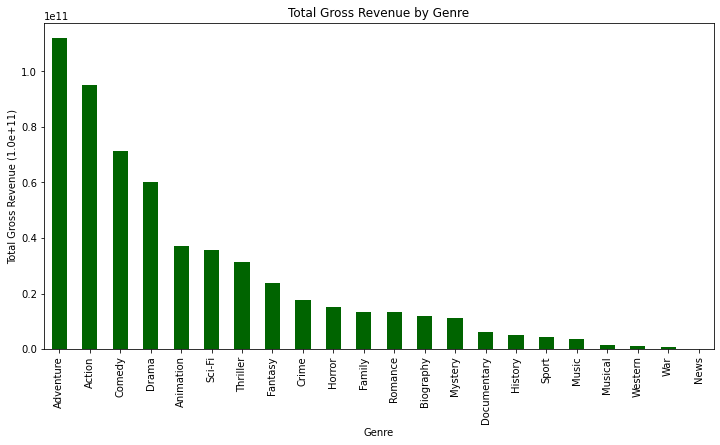

In [32]:
#compare total_gross against genres.
#this is achieved by grouping data
gross_genres = boxoffice_rating.groupby('genres')['total_gross'].sum()

# Sort the results in descending order (highest total gross first)
sorted_data = gross_genres.sort_values(ascending=False)

# Create a figure and set the figure size
plt.figure(figsize=(12, 6))
sorted_data.plot(kind='bar', color="darkgreen")

# Set plot title, labels, and x-axis rotation
plt.title('Total Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue (1.0e+11)');

In [33]:
df=boxoffice_rating.groupby('genres')['averagerating'].mean()
df.head()

genres
Action       6.348259
Adventure    6.506667
Animation    6.608081
Biography    7.036486
Comedy       6.263894
Name: averagerating, dtype: float64

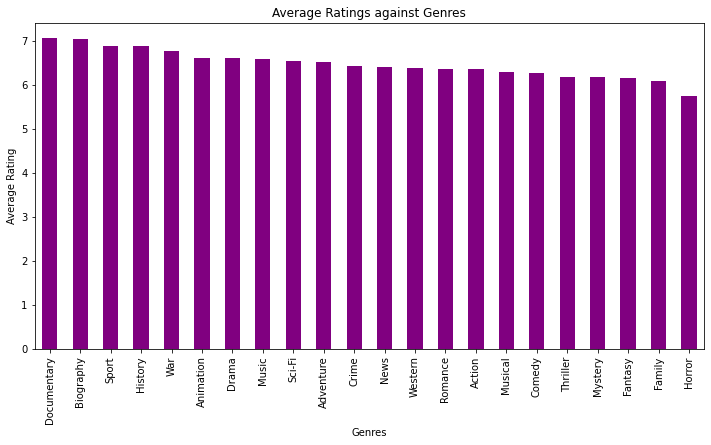

In [34]:
plt.figure(figsize=(12, 6))
ratings_genres = boxoffice_rating.groupby('genres')['averagerating'].mean()
sorted_data = ratings_genres.sort_values(ascending=False)
sorted_data.plot(kind='bar', color='purple')
plt.title("Average Ratings against Genres")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Average Rating");

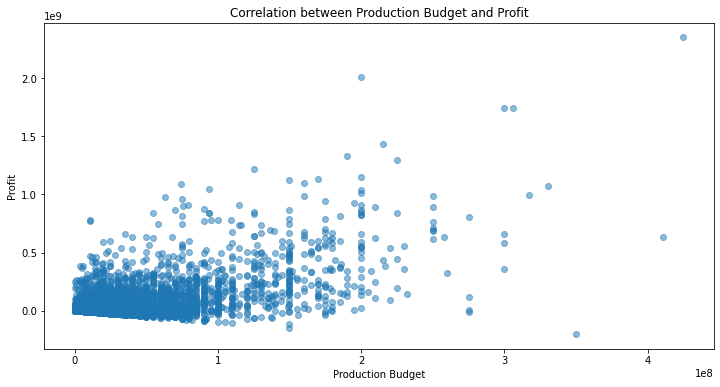

In [38]:
#tnmovie_budgets
plt.figure(figsize=(12, 6))
plt.scatter(tnmovie_budgets.production_budget, tnmovie_budgets.profit, alpha=0.5)
plt.title("Correlation between Production Budget and Profit")

#set labels and title
plt.xlabel("Production Budget")
plt.ylabel("Profit")

#show the plot
plt.show()

<Figure size 2160x1080 with 0 Axes>

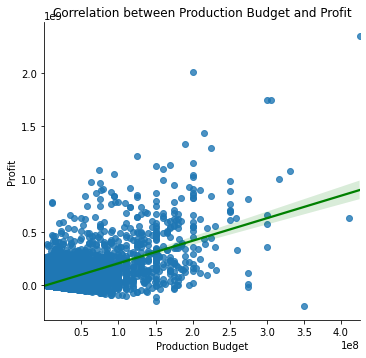

In [ ]:
#tnmovie_budgets
# Create a scatter plot with a regression line
plt.figure(figsize=(30, 15))
sns.lmplot(x='production_budget', y='profit', data=tnmovie_budgets, line_kws={'color': 'green'})

# Set labels and title
plt.xlabel("Production Budget")
plt.ylabel("Profit")
plt.title("Correlation between Production Budget and Profit");

# Show the plot
plt.show()

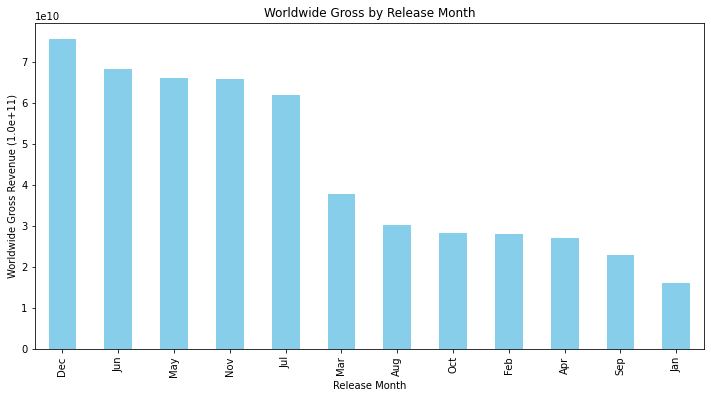

In [ ]:
#Compare total_gross against genres, this is achieved by grouping data
month_gross = tnmovie_budgets.groupby('release_month')['worldwide_gross'].sum()

# Sort the results in descending order (highest total gross first)
sorted_data = month_gross.sort_values(ascending=False)

# Create a figure and set the figure size
plt.figure(figsize=(12, 6))
sorted_data.plot(kind='bar', color="skyblue")

# Set plot title, labels, and x-axis rotation
plt.title('Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross Revenue (1.0e+11)');

## Recommendations & Insights